In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv('/content/heart_disease_uci.csv')

# Data Cleaning

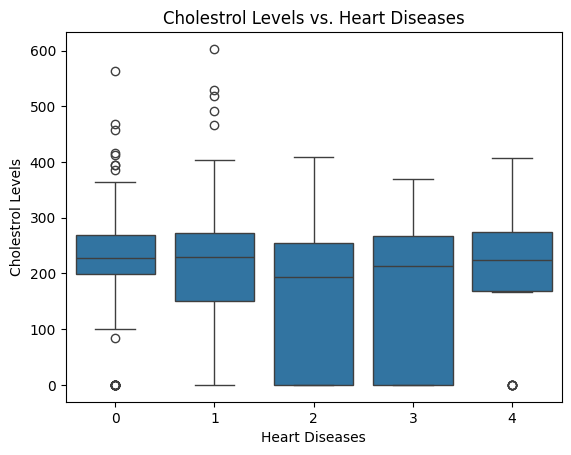

In [ ]:
sns.boxplot(df, x='num', y='chol')
plt.title('Cholestrol Levels vs. Heart Diseases')
plt.xlabel('Heart Diseases')
plt.ylabel('Cholestrol Levels')
plt.show()

### Handle Inappropriate Zeros

In [60]:
cols = ['trestbps', 'chol']
df[cols] = df[cols].replace(0, np.nan)

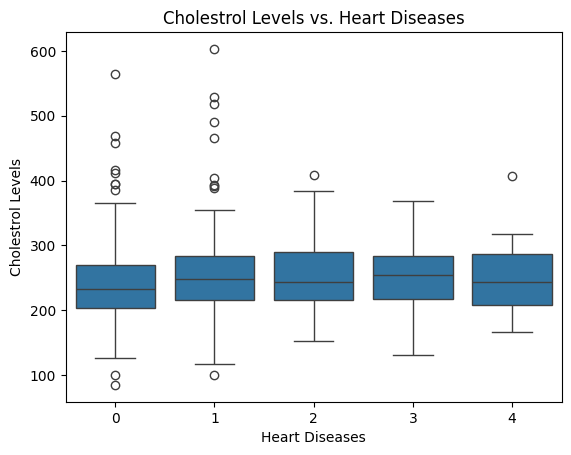

In [61]:
sns.boxplot(df, x='num', y='chol')
plt.title('Cholestrol Levels vs. Heart Diseases')
plt.xlabel('Heart Diseases')
plt.ylabel('Cholestrol Levels')
# plt.xticks([0,1,2,3,4], ['Nai', 'olpo ase', 'ase', 'beshi', 'voyaboho'])
plt.show()

### Fill in missing vaues

In [62]:
# for numeric columns: we use median values to fill (impute) missing values

numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# for categoric values we use the most_frequent vaues to fill missing data
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])


In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca          611
thal          0
num           0
dtype: int64

In [63]:
df.drop(['ca'], axis=1, inplace=True)

In [7]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

# Data Transform

### Label Encoding the Categorical Values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  thal      920 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 107.9+ KB


In [64]:
columns_to_encode = ['thal', 'dataset', 'slope', 'sex', 'num', 'cp', 'restecg','fbs', 'exang']

label_encoders = {}

for col in columns_to_encode:
  # create a new LabelEncoder
  le = LabelEncoder()

  # fit and transform the data
  df[col] = le.fit_transform(df[col])

  # store the encoder for later
  label_encoders[col] = le

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,1,0


### Transform the numeric *columns*

In [65]:
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
min_max_scalers = {}

for col in columns_to_scale:
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[[col]])

  min_max_scalers[col] = scaler

In [10]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,0.714286,1,0,3,0.541667,0.285714,1,0,0.633803,0,0.556818,0,0,0
1,2,0.795918,1,0,0,0.666667,0.388031,0,0,0.338028,1,0.465909,1,1,2
2,3,0.795918,1,0,0,0.333333,0.277992,0,0,0.485915,1,0.590909,1,2,1
3,4,0.183673,1,0,2,0.416667,0.318533,0,1,0.894366,0,0.693182,0,1,0
4,5,0.265306,0,0,1,0.416667,0.229730,0,0,0.788732,0,0.454545,2,1,0


In [11]:
df.describe()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,0.520630,0.789130,1.238043,0.782609,0.434475,0.309310,0.150000,0.990217,0.547130,0.366304,0.392416,1.152174,1.158696,0.995652
std,265.725422,0.192341,0.408148,1.130673,0.956350,0.149415,0.099972,0.357266,0.631863,0.177079,0.482056,0.120233,0.516007,0.483493,1.142693
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230.750000,0.387755,1.000000,0.000000,0.000000,0.333333,0.256274,0.000000,1.000000,0.422535,0.000000,0.295455,1.000000,1.000000,0.000000
50%,460.500000,0.530612,1.000000,1.000000,0.000000,0.416667,0.298263,0.000000,1.000000,0.563380,0.000000,0.352273,1.000000,1.000000,1.000000
75%,690.250000,0.653061,1.000000,2.000000,2.000000,0.500000,0.351351,0.000000,1.000000,0.676056,1.000000,0.465909,1.000000,1.000000,2.000000
max,920.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000


## Select only necessary values

In [66]:
X = df.drop(['id','num'], axis = 1)

In [67]:
X

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,0.714286,1,0,3,0.541667,0.285714,1,0,0.633803,0,0.556818,0,0
1,0.795918,1,0,0,0.666667,0.388031,0,0,0.338028,1,0.465909,1,1
2,0.795918,1,0,0,0.333333,0.277992,0,0,0.485915,1,0.590909,1,2
3,0.183673,1,0,2,0.416667,0.318533,0,1,0.894366,0,0.693182,0,1
4,0.265306,0,0,1,0.416667,0.229730,0,0,0.788732,0,0.454545,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.530612,0,3,0,0.391667,0.478764,1,2,0.661972,0,0.295455,1,1
916,0.693878,1,3,3,0.416667,0.104247,0,2,0.563380,0,0.352273,1,1
917,0.551020,1,3,0,0.350000,0.266409,1,2,0.281690,0,0.295455,1,0
918,0.612245,1,3,0,0.416667,0.579151,1,0,0.563380,0,0.352273,1,1


In [68]:
y = df['num']

In [69]:
y

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

## Splitting Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Train an ML classifier

## Train some models

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
model = RandomForestClassifier(n_estimators=1000, max_depth=30)

In [41]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=1000)

In [42]:
y_pred = model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our Random Forest model: ', accuracy)

Accuracy of our Random Forest model:  0.6141304347826086


In [32]:
# declare model
model = KNeighborsClassifier()

# train to data
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our KNN model: ', accuracy)

Accuracy of our KNN model:  0.5489130434782609


In [35]:
# declare model
model = XGBClassifier()

# train to data
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our KNN model: ', accuracy)

Accuracy of our KNN model:  0.5978260869565217


## Evaluate their performances

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        77
           1       0.69      0.55      0.61        67
           2       0.20      0.29      0.24        14
           3       0.29      0.25      0.27        20
           4       0.00      0.00      0.00         6

    accuracy                           0.61       184
   macro avg       0.38      0.39      0.38       184
weighted avg       0.60      0.61      0.60       184



In [50]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

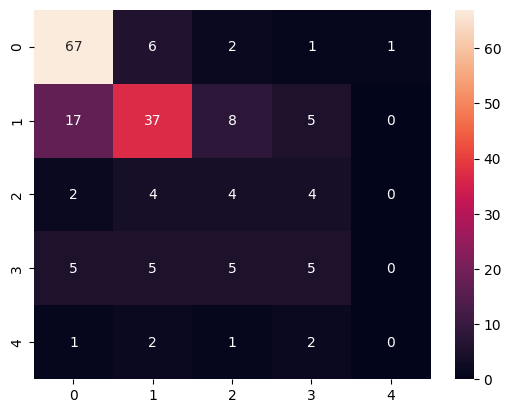

In [51]:
sns.heatmap(cm, annot=True)

# Binary Classifcation

In [76]:
y_binary = df['num']
y_binary

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

In [77]:
y_binary = y_binary.replace(2, 1)
y_binary = y_binary.replace(3, 1)
y_binary = y_binary.replace(4, 1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, train_size=0.8)

In [82]:
# declare model
model = RandomForestClassifier(n_estimators=1000, max_depth=30)

# train to data
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our Random Forest model: ', accuracy)

Accuracy of our Random Forest model:  0.7989130434782609


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        70
           1       0.86      0.81      0.83       114

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184



<Axes: >

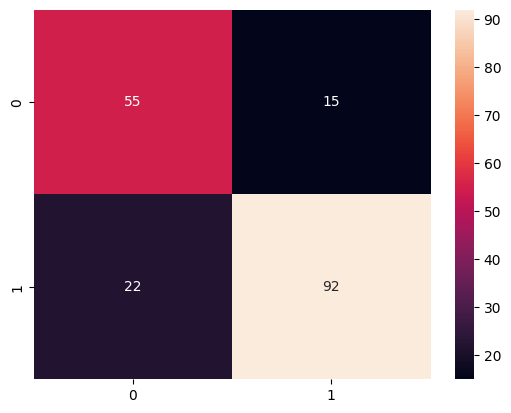

In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
# # model predict korse heart disease ase, ashole ase
# True Positive

# # model predict korse heart disease nai, ashole nai
# True Negative

# # model predict korse heart disease ase, ashole nai
# False Positive

# # model predict korse heart disease nai, ashole ase
# False Negative